In [7]:
# Импортирование необходимых библиотек
import datetime
import pandas as pd
import numpy as np
from joblib import dump
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from datetime import datetime
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split



In [8]:
train_dataset = pd.read_csv('../data/backup/train_dataset.csv')
test_dataset = pd.read_csv('../data/backup/test_dataset.csv')

In [9]:
# #отрежем месяц для проверки через другой датасет
# secret_df = test_dataset.iloc[-720:]
# secret_df.to_csv("secret.csv",float_format='%.5f',mode='w',index=False)

In [10]:

# Сначала объедините колонки "date" и "time" в одну колонку "datetime"

def make_dt_col(row_date,row_time):
    return pd.to_datetime(row_date)+pd.to_timedelta(row_time,unit='h')
train_dataset['datetime']=train_dataset.apply(lambda x: make_dt_col(x['date'],x['time']),axis=1)

test_dataset['datetime']=test_dataset.apply(lambda x: make_dt_col(x['date'],x['time']),axis=1)

In [11]:
# Установите "datetime" в качестве индекса
train_dataset.set_index('datetime', inplace=True)
print(train_dataset.columns)
test_dataset.set_index('datetime', inplace=True)
print(test_dataset.columns)

Index(['date', 'time', 'target', 'temp', 'temp_pred', 'weather_pred',
       'weather_fact'],
      dtype='object')
Index(['date', 'time', 'target', 'temp', 'temp_pred', 'weather_pred',
       'weather_fact'],
      dtype='object')


In [12]:
# Если вам нужно убедиться, что индекс отсортирован, вы можете использовать
train_dataset.sort_index(inplace=True)
print(train_dataset.columns)
test_dataset.sort_index(inplace=True)
print(train_dataset.columns)

Index(['date', 'time', 'target', 'temp', 'temp_pred', 'weather_pred',
       'weather_fact'],
      dtype='object')
Index(['date', 'time', 'target', 'temp', 'temp_pred', 'weather_pred',
       'weather_fact'],
      dtype='object')


In [13]:
# # Выберите только те столбцы, которые вы хотите преобразовать в числовой формат
# columns_to_convert = train_dataset.columns[:-2]  # Исключаем последние два столбца
# columns_to_convert = test_dataset.columns[:-2]  # Исключаем последние два столбца
# print(test_dataset.head())

In [14]:
test_dataset['time'] = test_dataset['time'].apply(int)
test_dataset

,date,time,target,temp,temp_pred,weather_pred,weather_fact
datetime,,,,,,,
2023-04-01 00:00:00,2023-04-01,0,479.282,5.7,5.0,"пасм, 58%","пасм, морось"
2023-04-01 01:00:00,2023-04-01,1,445.182,5.7,5.0,"пасм, 58%","пасм, морось"
2023-04-01 02:00:00,2023-04-01,2,424.225,5.7,5.0,"пасм, 58%","пасм, морось"
2023-04-01 03:00:00,2023-04-01,3,413.866,5.0,4.0,"пасм, 71% дождь","пасм, дымка"
2023-04-01 04:00:00,2023-04-01,4,408.146,5.0,4.0,"пасм, 71% дождь","пасм, дымка"
...,...,...,...,...,...,...,...
2023-07-31 19:00:00,2023-07-31,19,453.173,17.2,18.0,"пасм, 24% дождь",п/обл
2023-07-31 20:00:00,2023-07-31,20,446.287,17.2,18.0,"пасм, 24% дождь",п/обл
2023-07-31 21:00:00,2023-07-31,21,444.373,15.8,17.0,"пасм, 24% дождь",п/обл


In [15]:

# Заменить все нечисловые значения на NaN
train_dataset = train_dataset.apply(pd.to_numeric, errors='coerce')
test_dataset = test_dataset.apply(pd.to_numeric, errors='coerce')


In [16]:

# Продолжайте с преобразованием в числовой формат и дальнейшей обработкой данных
train_dataset = train_dataset.astype('float32')
columns_to_convert = train_dataset.columns[:-2]

test_dataset = test_dataset.astype('float32')
columns_to_convert = test_dataset.columns[:-2]

In [17]:
# Заполнение пропущенных значений средними значениями
train_dataset['temp'].fillna(train_dataset['temp'].mean(), inplace=True)
test_dataset['temp'].fillna(test_dataset['temp'].mean(), inplace=True)
train_dataset['temp_pred'].fillna(train_dataset['temp_pred'].mean(), inplace=True)
test_dataset['temp_pred'].fillna(test_dataset['temp_pred'].mean(), inplace=True)

In [18]:
# Просмотр данных
print("Тренировочные данные:")
print(train_dataset.head())

print("Тестовые данные:")
print(test_dataset.head())


Тренировочные данные:
                     date  time      target  temp  temp_pred  weather_pred  \
datetime                                                                     
2019-01-01 00:00:00   NaN   0.0  481.510010   2.9        2.0           NaN   
2019-01-01 01:00:00   NaN   1.0  462.872009   2.9        2.0           NaN   
2019-01-01 02:00:00   NaN   2.0  449.717987   2.9        2.0           NaN   
2019-01-01 03:00:00   NaN   3.0  430.907990   4.3        2.0           NaN   
2019-01-01 04:00:00   NaN   4.0  415.162994   4.3        2.0           NaN   

                     weather_fact  
datetime                           
2019-01-01 00:00:00           NaN  
2019-01-01 01:00:00           NaN  
2019-01-01 02:00:00           NaN  
2019-01-01 03:00:00           NaN  
2019-01-01 04:00:00           NaN  
Тестовые данные:
                     date  time      target  temp  temp_pred  weather_pred  \
datetime                                                                     
2023-0

In [19]:
# Теперь выберите числовые признаки для обучения
X_train = train_dataset[['temp', 'time','temp_pred']]
y_train = train_dataset['target']

X_test = test_dataset[['temp', 'time','temp_pred']]
y_test = test_dataset['target']

Создание и обучение моделей

In [20]:
# # Линейная регрессия
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

In [21]:
# # Случайный лес
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

In [22]:
# MAPE (Mean Absolute Percentage Error)
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_lr = calculate_mape(y_test, y_pred_lr)
mape_rf = calculate_mape(y_test, y_pred_rf)

print("MAPE (Linear Regression): {:.2f}%".format(mape_lr))
print("MAPE (Random Forest): {:.2f}%".format(mape_rf))

MAPE (Linear Regression): 14.48%
MAPE (Random Forest): 6.43%


In [23]:
# R2 score
r2_lr = r2_score(y_test, y_pred_lr)
r2_rf = r2_score(y_test, y_pred_rf)
print("R2 Score (Linear Regression): {:.2f}".format(r2_lr))
print("R2 Score (Random Forest): {:.2f}".format(r2_rf))

R2 Score (Linear Regression): 0.12
R2 Score (Random Forest): 0.74


In [24]:
# Вычисление MAE
def show_mae(y1,y2):
    print("Mean Absolute Error (MAE):",mean_absolute_error(y1,y2))
print("По модели линейной регрессии:")
show_mae(y_test,y_pred_lr)
print("По модели рандом форест:")
show_mae(y_test,y_pred_rf)

По модели линейной регрессии:
Mean Absolute Error (MAE): 56.45035
По модели рандом форест:
Mean Absolute Error (MAE): 26.702991030046263


выбираем модель рандом форест по лучшим показателям

In [25]:

y_pred = y_pred_rf
model = model_rf
# И выводим предсказания
print(y_pred)

[451.16028816 423.47622755 394.42661304 ... 436.87330785 446.05085996
 422.69330358]


Сохраняем модель в файл через joblib

In [26]:

with open("../model/trained.joblib","wb") as dump_file:
    dump(model,dump_file)

In [27]:
# Подгружаем датасет на другие даты и прогноз по нему 

forecast = pd.read_csv('../result.csv')



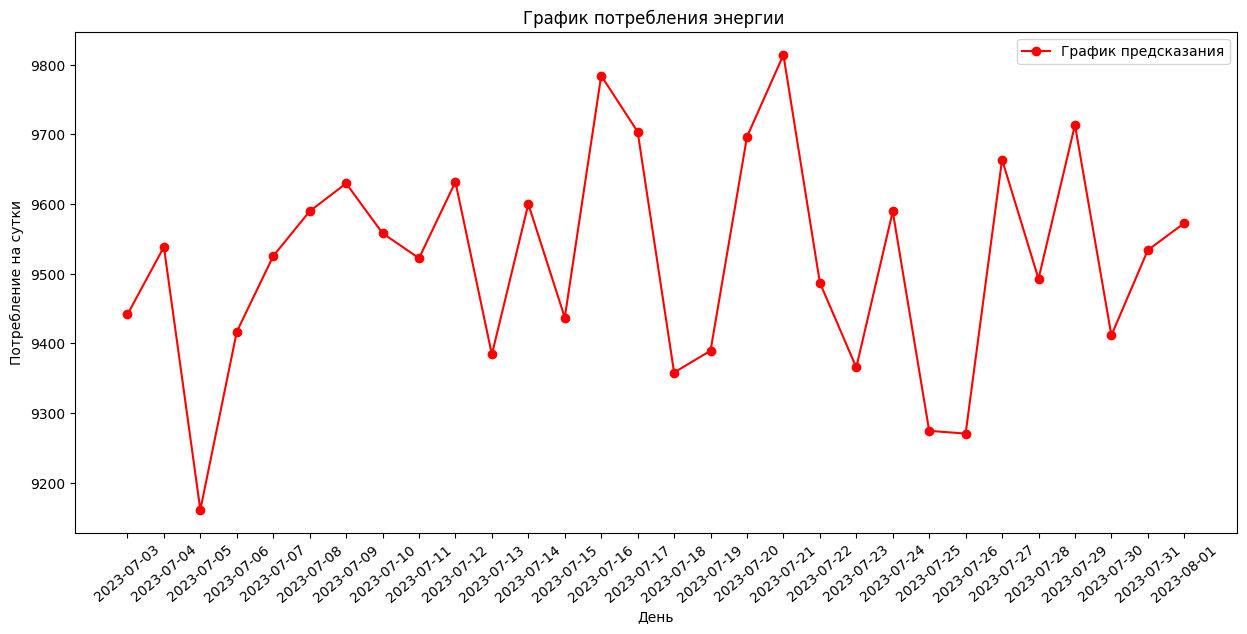

In [32]:
# Предсказанные значения
Y_axis = forecast['predict']
# Ваши временные индексы (например, временные метки)
X_axis = forecast['date'] 
# Создаем график
plt.figure(figsize=(15, 6.5))
# plt.plot(time_indices, true_values, label='Исходные значения', color='b')
plt.plot(X_axis, Y_axis, label='График предсказания', color='r', marker='o')
plt.xlabel('День')
plt.xticks(rotation=40)
plt.ylabel("Потребление на сутки")
plt.legend()
plt.title('График потребления энергии ')
plt.show()

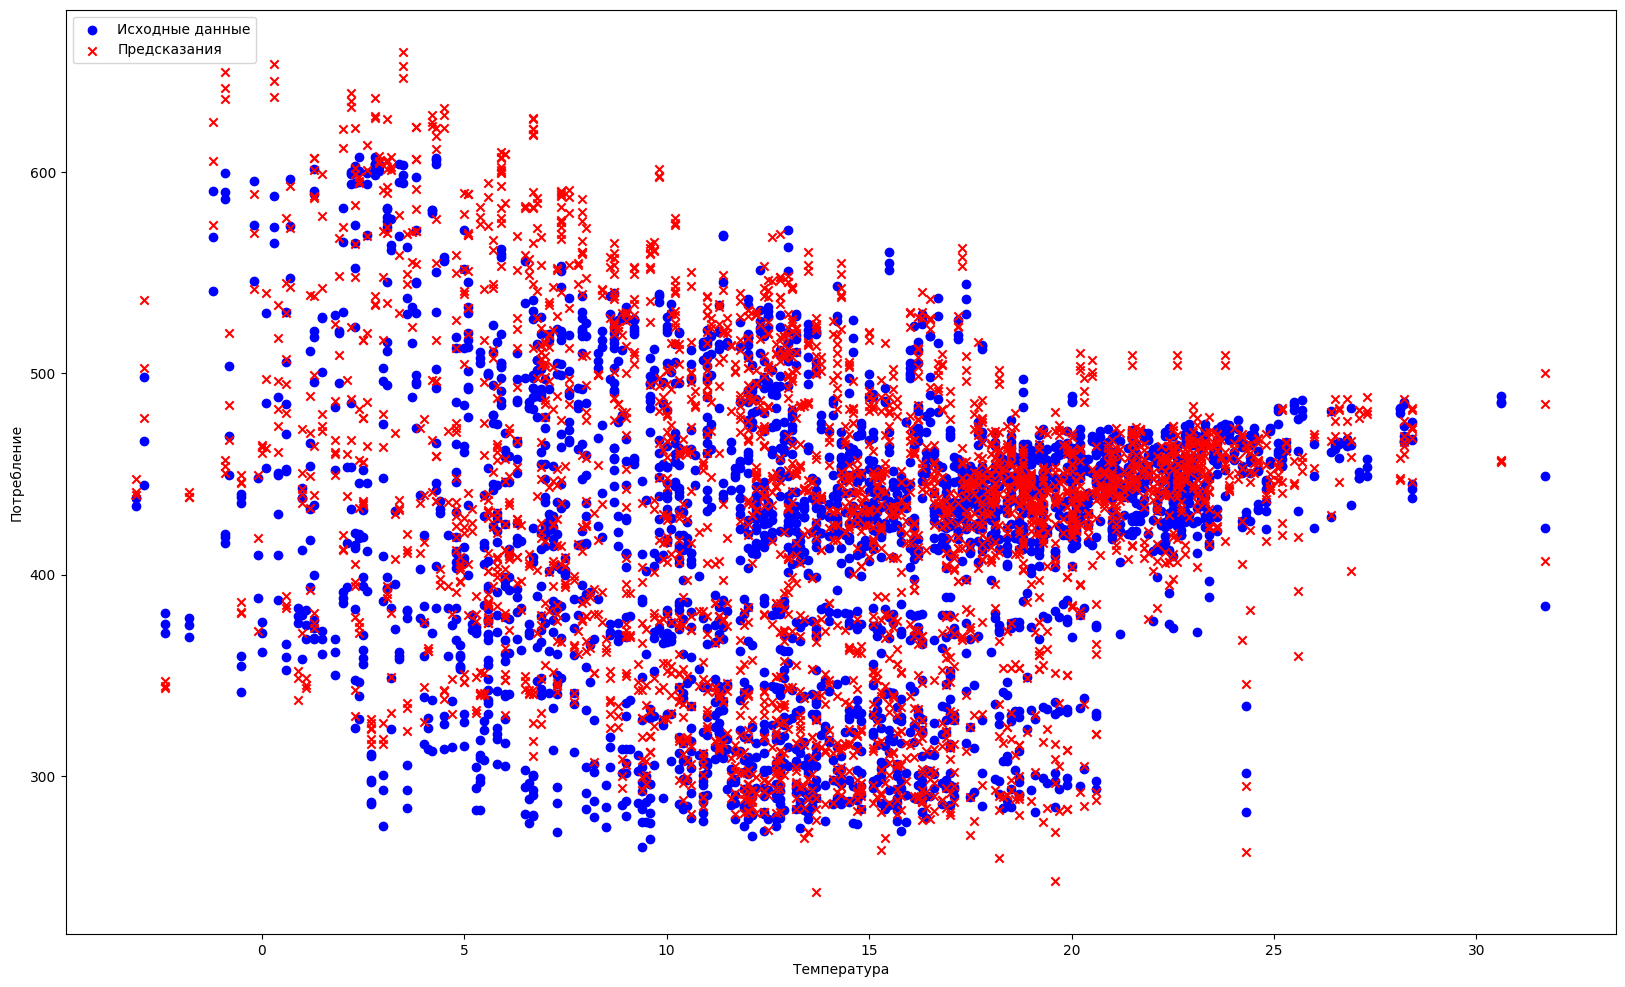

In [29]:
# Создаем график
plt.figure(figsize=(20, 12))
# Рисуем точки с исходными данными из тестового набора данных
plt.scatter(X_test['temp'], y_test, label='Исходные данные', color='blue')
# Рисуем предсказания модели
plt.scatter(X_test['temp'], y_pred, label='Предсказания', color='red', marker='x')
# Добавляем легенду
plt.legend(loc='upper left')
# Добавляем подписи к осям
plt.xlabel('Температура')
plt.ylabel('Потребление')
# Отображаем график
plt.show()